In [ ]:
#Importing Liraries

# Importing Libraries
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
import shutil
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import random
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from scipy.sparse import hstack
from wordcloud import WordCloud


# Utilities
#from viz_utils import *
#from custom_transformers import *
#from ml_utils import *

# DataPrep
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Normalizer

# Modeling

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier, AdaBoostClassifier
#Metrics
from sklearn.metrics import log_loss,accuracy_score, confusion_matrix, f1_score





#Importing the Libraries
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading data
data = pd.read_pickle('/content/drive/MyDrive/final.pkl')
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3,voucher,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,2,voucher,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Só achei ela pequena pra seis xícaras ,mais é ..."


#1.Data Preprocessing

## Preprocessing Review Text

In [ ]:
#text data preprocessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [ ]:
# portugese language stopwords
stopwords_pt = stopwords.words("portuguese")
print(f'Total portuguese stopwords in the nltk.corpous module: {len(stopwords_pt)}')
print('Few Stopwords:',stopwords_pt[0:20])

Total portuguese stopwords in the nltk.corpous module: 207
Few Stopwords: ['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele']


In [ ]:
#removing 'nao' & 'nem'
stopwords_pt.remove('não')
stopwords_pt.remove('nem')

In [ ]:
data['review_comment_message'].head(5)

0    Não testei o produto ainda, mas ele veio corre...
1    Não testei o produto ainda, mas ele veio corre...
2    Não testei o produto ainda, mas ele veio corre...
3    Deveriam embalar melhor o produto. A caixa vei...
4    Só achei ela pequena pra seis xícaras ,mais é ...
Name: review_comment_message, dtype: object

In [ ]:
def preprocess_text(texts):
    hyperlinks = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+' # check for hyperlinks
    dates = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}' # check for dates
    currency_symbols = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+' # check for currency symbols
    preprocessed_text = []
    stemmer = RSLPStemmer() # portugese nltk stemmer
    for sent in tqdm(texts):
        sent = re.sub(r"[\n\t\-\\\/]"," ",sent)#removing the new line,tab  
        sent = re.sub(hyperlinks, ' url ', sent) # replacing hyperlinks with 'url'
        sent = re.sub(dates, ' ', sent) # removing dates
        sent = re.sub(currency_symbols, ' dinheiro ', sent) # replacing currency symbols with 'dinheiro'
        sent = re.sub('[0-9]+', ' numero ', sent) # removing digits
        sent = re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', ' negação ', sent) # replacing no with negative
        sent = re.sub('\W', ' ', sent) # removing extra whitespaces
        sent = re.sub('\s+', ' ', sent) # removing extra spaces
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords_pt) # removing stopwords
        sent = ' '.join(stemmer.stem(e.lower()) for e in sent.split()) # stemming the words
        preprocessed_text.append(sent.lower().strip())
        
    return preprocessed_text

In [ ]:
processed_text = preprocess_text(data['review_comment_message'].values)

100%|██████████| 115609/115609 [00:22<00:00, 5155.64it/s]


In [ ]:
data['review_comment_message'] = processed_text
data['review_comment_message'].head(5)

0    neg test produt aind vei corret boa cond apen ...
1    neg test produt aind vei corret boa cond apen ...
2    neg test produt aind vei corret boa cond apen ...
3    dev embal melhor produt caix vei tod amass vou...
4                   ach pequen pra seil xíc bom produt
Name: review_comment_message, dtype: object

In [ ]:
col= ['order_id',
 'customer_id',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
  'customer_unique_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'customer_city','customer_zip_code_prefix','product_category_name']

In [ ]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_score',
       'review_comment_message'],
      dtype='object')

In [ ]:
data.drop(columns=col,axis=1,inplace=True)

In [ ]:
data.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_state,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,delivered,1,credit_card,1,18.12,SP,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,neg test produt aind vei corret boa cond apen ...
1,delivered,3,voucher,1,2.00,SP,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,neg test produt aind vei corret boa cond apen ...
2,delivered,2,voucher,1,18.59,SP,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,neg test produt aind vei corret boa cond apen ...
3,delivered,1,credit_card,3,37.77,SP,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,dev embal melhor produt caix vei tod amass vou...
4,delivered,1,credit_card,1,37.77,SP,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,ach pequen pra seil xíc bom produt


<h3>Splitting data into Train and Test: Stratified Sampling</h3>


In [ ]:
y = data['review_score'].values
X = data.drop(['review_score'], axis=1)
print("      X ","        y")
print(X.shape,y.shape)
print('\n')
X.head(1)   

      X          y
(115609, 17) (115609,)




,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_state,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_comment_message
0,delivered,1,credit_card,1,18.12,SP,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,neg test produt aind vei corret boa cond apen ...


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=25)


print(" X_train","   y_train")
print(X_train.shape,y_train.shape)
print('-'*15)
print("X_test","    y_test")
print(X_test.shape,y_test.shape)

 X_train    y_train
(92487, 17) (92487,)
---------------
X_test     y_test
(23122, 17) (23122,)


#2.Featurization

## Encoding Categorical Features





### Encoding Categorical Features: order_status

In [ ]:
vect_os_tr = CountVectorizer(binary= True)
vect_os_tr.fit(X_train['order_status'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
order_st_tr = vect_os_tr.transform(X_train['order_status'].values)

order_st_te = vect_os_tr.transform(X_test['order_status'].values)
name_os =vect_os_tr.get_feature_names()

print("After vectorizations")
print(order_st_tr.shape, y_train.shape)
print(order_st_tr.shape, y_test.shape)
print(name_os)

After vectorizations
(92487, 7) (92487,)
(92487, 7) (23122,)
['approved', 'canceled', 'delivered', 'invoiced', 'processing', 'shipped', 'unavailable']


### Encoding Categorical Features:payment_type

In [ ]:
vectorizer = CountVectorizer(binary= True)
vectorizer.fit(X_train['payment_type'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
pay_typ_tr = vectorizer.transform(X_train['payment_type'].values)

pay_typ_te = vectorizer.transform(X_test['payment_type'].values)
name_typ = vectorizer.get_feature_names()
print("After vectorizations")
print(pay_typ_tr.shape, y_train.shape)
print(pay_typ_tr.shape, y_test.shape)


After vectorizations
(92487, 4) (92487,)
(92487, 4) (23122,)


### Encoding Categorical Features:product_category_name_english

In [ ]:
vectorizer = CountVectorizer(binary= True)
vectorizer.fit(X_train['product_category_name_english'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
prod_cat_tr = vectorizer.transform(X_train['product_category_name_english'].values)

prod_cat_te = vectorizer.transform(X_test['product_category_name_english'].values)
name_prd = vectorizer.get_feature_names()
print("After vectorizations")
print(prod_cat_tr.shape, y_train.shape)
print(prod_cat_tr.shape, y_test.shape)

After vectorizations
(92487, 71) (92487,)
(92487, 71) (23122,)


### Encoding Categorical Features: customer_state

In [ ]:
vectorizer = CountVectorizer(binary= True)
vectorizer.fit(X_train['customer_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
state_tr = vectorizer.transform(X_train['customer_state'].values)

state_te = vectorizer.transform(X_test['customer_state'].values)
name_st = vectorizer.get_feature_names()

print("After vectorizations")
print(state_tr.shape, y_train.shape)
print(state_tr.shape, y_test.shape)

After vectorizations
(92487, 27) (92487,)
(92487, 27) (23122,)


## Featurization of text data

In [ ]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 4.4 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3162170 sha256=08ddd9896de5d9a993c4be80de17183ffc5768debf3433d2307eb78d215bed89
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import fasttext.util
fasttext.util.download_model('pt', if_exists='ignore')  #Portuguese

'cc.pt.300.bin'

In [ ]:
from gensim.models import FastText
ft_model = FastText.load_fasttext_format('cc.pt.300.bin')

In [ ]:
ft_model.wv['melhor'].shape

(300,)

In [ ]:
ft_model.similar_by_vector('produt')

[('produts', 0.6906509399414062),
 ('produ', 0.6056191921234131),
 ('produtoa', 0.5977535843849182),
 ('produe', 0.57929527759552),
 ('produto', 0.5772074460983276),
 ('produtos', 0.5754655003547668),
 ('produtoo', 0.5647249221801758),
 ('protudo', 0.5558850765228271),
 ('produtoe', 0.5553520321846008),
 ('vend', 0.5546207427978516)]

In [ ]:
def tfidfWord2Vector(text,ft_words,tfidf_words,tf_values):
    # average Word2Vec
    # compute average word2vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(text): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in ft_words) and (word in tfidf_words):
                vec = ft_model.wv[word] # embeddings[word] 
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = tf_values[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    tfidf_w2v_vectors = np.asarray(tfidf_w2v_vectors)
    
    return tfidf_w2v_vectors

In [ ]:
# encoding review comment message using Tfidf weighted W2V
tfidf = TfidfVectorizer()
tfidf.fit(X_train['review_comment_message'])


# we are converting a dictionary with word as a key, and the idf as a value
tf_values = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_words = set(tfidf.get_feature_names())
ft_words = list(ft_model.wv.vocab.keys()) # list(embeddings.keys())

tfidf_w2v_vectors_train = tfidfWord2Vector(X_train['review_comment_message'].values,ft_words,tfidf_words,tf_values)
tfidf_w2v_vectors_test = tfidfWord2Vector(X_test['review_comment_message'].values,ft_words,tfidf_words,tf_values)

100%|██████████| 23122/23122 [22:25<00:00, 17.18it/s]


In [ ]:
pickle.dump(tfidf_w2v_vectors_train,open('tfidf_w2v_vectors_train_1.pkl','wb'))
pickle.dump(tfidf_w2v_vectors_test,open('tfidf_w2v_vectors_test_1.pkl','wb'))

In [ ]:
tfidf_w2v_vectors_train = pickle.load( open('tfidf_w2v_vectors_train_1.pkl','rb'))

In [ ]:
tfidf_w2v_vectors_test = pickle.load( open('tfidf_w2v_vectors_test_1.pkl','rb'))

## Numerical_features

In [ ]:
from sklearn.preprocessing import Normalizer
def normalizer(col):
  normalizer = Normalizer()
  normalizer.fit(X_train[col].values.reshape(-1,1))
  X_train_norm = normalizer.transform(X_train[col].values.reshape(-1,1))
  X_test_norm = normalizer.transform(X_test[col].values.reshape(-1,1))
  return X_train_norm,X_test_norm

In [ ]:

# numerical features
num=['payment_sequential',
 'payment_installments',
 'payment_value',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',]


In [ ]:
tr=[]
te=[]
for i in num:
  a,b = normalizer(i)
  tr.append(a)
  te.append(b)

In [ ]:
from scipy.sparse import hstack,csr_matrix
import numpy as np

X_tr_num = np.hstack((tr))
X_te_num = np.hstack((te))


print("Final Data matrix")
print(X_tr_num.shape, y_train.shape)
print(X_te_num.shape, y_test.shape)

Final Data matrix
(92487, 12) (92487,)
(23122, 12) (23122,)


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((tfidf_w2v_vectors_train,order_st_tr,pay_typ_tr,prod_cat_tr,state_tr,X_tr_num)).tocsr()
X_te = hstack((tfidf_w2v_vectors_test,order_st_te,pay_typ_te,prod_cat_te,state_te,X_te_num)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)

print(X_te.shape, y_test.shape)
print("="*100)
print('')

Final Data matrix
(92487, 421) (92487,)
(23122, 421) (23122,)



#3.Baseline Models

### Random Model

In [ ]:
def confusion_matrices_plot(y_real, y_pred, y_test,y_test_pred,name):
    # representing confusion matric in heatmap format
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    cmap_ = sns.light_palette("#425a90",as_cmap=True)
    cmap = sns.light_palette("#000000",as_cmap=True)
    C1 = confusion_matrix(y_real,y_pred)
    C2 = confusion_matrix(y_test,y_test_pred)
    
    fig,ax = plt.subplots(1, 2, figsize=(15,5))
    ax1 = sns.heatmap(C1, annot=True, cmap=cmap, fmt=".2f", ax = ax[0])
    ax1.set_xlabel('Predicted Class')
    ax1.set_ylabel('Original Class')
    ax1.set_title("Train Confusion matrix")

    ax2 = sns.heatmap(C2, annot=True, cmap=cmap_, fmt=".2f", ax = ax[1])
    ax2.set_xlabel('Predicted Class')
    ax2.set_ylabel('Original Class')
    ax2.set_title("Test Confusion matrix")
    plt.savefig(name, dpi=480, bbox_inches='tight')
    plt.show()

Train f1-score 0.4358050104965361
Test f1-score 0.4366710992944943


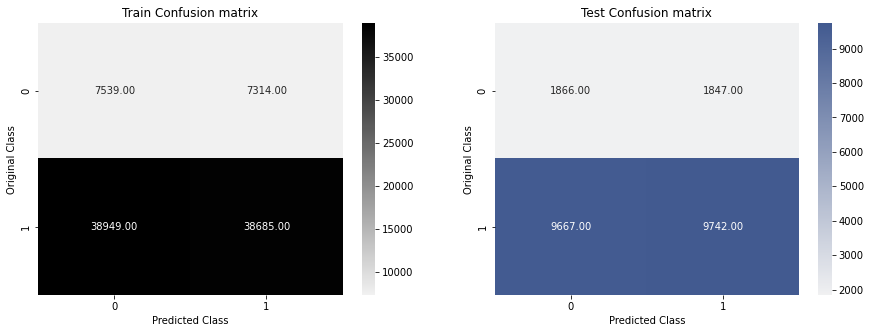

In [ ]:
#creating random model
test_data_len = X_te.shape[0]
train_data_len = X_tr.shape[0]

# we create a output array that has exactly same size as the CV data
y_train_pred = np.zeros((train_data_len,1))
for i in range(train_data_len):
    rand_c = random.randint(0, 1)
    y_train_pred[i] = (rand_c)
print("Train f1-score",f1_score(y_train,y_train_pred,average='macro'))
y_test_pred = np.zeros((test_data_len,1))
for i in range(test_data_len):
    rand_c = random.randint(0, 1)
    y_test_pred[i] = (rand_c)
print("Test f1-score",f1_score(y_test,y_test_pred,average='macro'))
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred,'bs_rn.png')


### Naive Bayes Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_tr.todense())
X_tr = scaler.transform(X_tr.todense())

In [ ]:
scaler.fit(X_te.todense())
X_te = scaler.transform(X_te.todense())

Alpha =  1e-05 Train Score 0.5891603452537357 test Score 0.5938052935662357
Alpha =  0.0001 Train Score 0.5891603452537357 test Score 0.5938052935662357
Alpha =  0.001 Train Score 0.5891603452537357 test Score 0.5938052935662357
Alpha =  0.01 Train Score 0.5891603452537357 test Score 0.5938052935662357
Alpha =  0.1 Train Score 0.5891259248346947 test Score 0.5937706855514657
Alpha =  1 Train Score 0.5891259248346947 test Score 0.5937706855514657
Alpha =  10 Train Score 0.5891434749528733 test Score 0.5937706855514657
Alpha =  100 Train Score 0.5891083742182206 test Score 0.5936302447027362
Alpha =  1000 Train Score 0.5844653116498433 test Score 0.5934548837856852


Text(0.5, 1.0, 'Alpha vs Score')

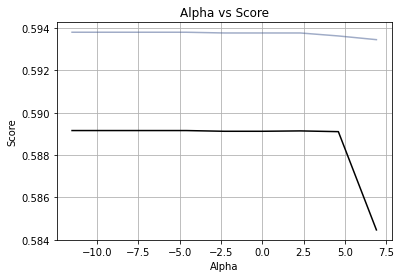

In [ ]:
# Training naive bayes model and chekcing f1 score metric
from sklearn.naive_bayes import MultinomialNB
alpha = [10 ** x for x in range(-5, 4)]
train_scores = [] # store train scores
test_scores = [] # store test scores

for i in alpha:
    nb_cfl=MultinomialNB(alpha=i,fit_prior=False)
    nb_cfl.fit(X_tr,y_train)
    train_sc = f1_score(y_train,nb_cfl.predict(X_tr),average='macro')
    test_sc = f1_score(y_test,nb_cfl.predict(X_te),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Alpha = ',i,'Train Score',train_sc,'test Score',test_sc)
    
# plotting the scores vs parameters
plt.plot(np.log(alpha),train_scores,label='Train Score',color='black')
plt.plot(np.log(alpha),test_scores,label='Test Score',color='#425a90',alpha=0.5)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid()
plt.title('Alpha vs Score')

In [ ]:
# Parameter tuning of naive bayes using RandomisedSearch CV technique
clf = MultinomialNB( class_prior=np.array([0.5,0.5]),fit_prior=False)

 
prams={ 'alpha': [10 ** x for x in range(-5, 4)] }

nb_cfl = RandomizedSearchCV(clf,param_distributions=prams,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,
                               return_train_score=True)
nb_cfl.fit(X_tr,y_train)

print('mean test scores',nb_cfl.cv_results_['mean_test_score'])
print('mean train scores',nb_cfl.cv_results_['mean_train_score'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
mean test scores [0.58918093 0.58918093 0.58918093 0.58918093 0.5891384  0.58913024
 0.58913024 0.58911273 0.51509946]
mean train scores [0.58926211 0.58926211 0.58926211 0.58926211 0.58920615 0.58913934
 0.58913936 0.58910865 0.5153343 ]


In [ ]:
# printing best parameters and score
print("Best Parameters: ",nb_cfl.best_params_)
print("Best Score: ",nb_cfl.best_score_)

Best Parameters:  {'alpha': 10}
Best Score:  0.5781748042968806


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = MultinomialNB(alpha = 10, class_prior=np.array([0.5,0.5]),fit_prior=False)
clf.fit(X_tr, y_train)

y_train_pred = clf.predict(X_tr)    
y_test_pred = clf.predict(X_te)


print('Train f1 score: ',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score: ',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score:  0.5891434749528733
Test f1 score:  0.5937706855514657


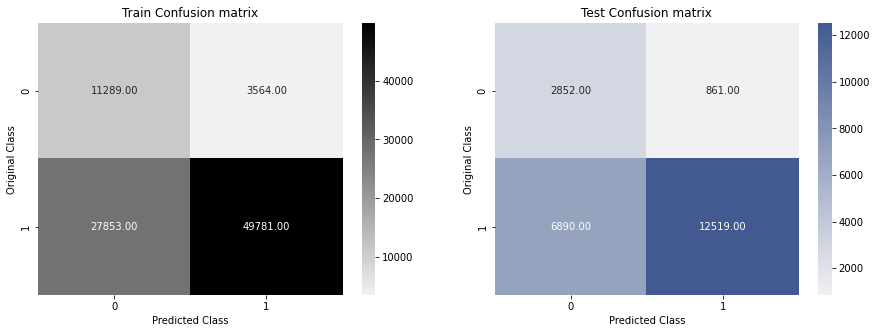

In [ ]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred,'bs_nb.png')

### Logistic Regression Model

Alpha =  1e-05 Train Score 0.7955813801305918 test Score 0.6161476741115062
Alpha =  0.0001 Train Score 0.7908807534766533 test Score 0.8101568640403827
Alpha =  0.001 Train Score 0.6027399466880193 test Score 0.7086059943654911
Alpha =  0.01 Train Score 0.5182516302090214 test Score 0.5336486294232773
Alpha =  0.1 Train Score 0.45634577741725 test Score 0.45634948625708305
Alpha =  1 Train Score 0.45634577741725 test Score 0.45634948625708305
Alpha =  10 Train Score 0.45634577741725 test Score 0.45634948625708305
Alpha =  100 Train Score 0.45634577741725 test Score 0.45634948625708305
Alpha =  1000 Train Score 0.45634577741725 test Score 0.45634948625708305


Text(0.5, 1.0, 'Alpha vs Score')

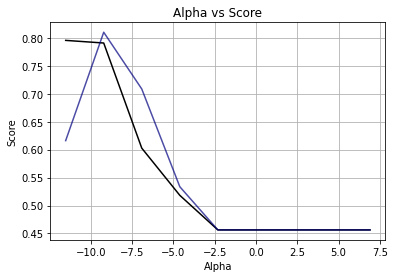

In [ ]:
# Training Logistic regression model and chekcing f1 score metric
alpha = [10 ** x for x in range(-5, 4)]
train_scores = [] # store train scores
test_scores = [] # store test scores

for i in alpha:
    lr = SGDClassifier(loss='log', penalty='l2', alpha=i, n_jobs=-1, random_state=25)
    lr.fit(X_tr,y_train)
    train_sc = f1_score(y_train,lr.predict(X_tr),average='macro')
    test_sc = f1_score(y_test,lr.predict(X_te),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Alpha = ',i,'Train Score',train_sc,'test Score',test_sc)
    
# plotting the scores vs parameters
plt.plot(np.log(alpha),train_scores,label='Train Score',color='black')
plt.plot(np.log(alpha),test_scores,label='Test Score',color='#000080',alpha=0.7)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid()
plt.title('Alpha vs Score')

In [ ]:
# Parameter tuning of Logistic regression using RandomisedSearch CV technique
sgd = SGDClassifier(loss='log', n_jobs=-1, random_state=25)
 
prams={ 'alpha': [10 ** x for x in range(-5, 4)] }

random_cfl1 = RandomizedSearchCV(sgd,param_distributions=prams,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,
                               return_train_score=True)
random_cfl1.fit(X_tr,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.3min finished


mean test scores [0.77745235 0.68812959 0.61063596 0.51191047 0.46088499 0.46088499
 0.46088499 0.46088499 0.46088499]
mean train scores [0.78603913 0.69077989 0.61161072 0.51202548 0.46088499 0.46088499
 0.46088499 0.46088499 0.46088499]


In [ ]:
# printing best parameters and score
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters:  {'alpha': 1e-05}
Best Score:  0.777452354036805


In [ ]:
# Fitting LogisticRegression mpdel on best parameters
sgd = SGDClassifier(loss='log', alpha=1e-05, n_jobs=-1, random_state=25)
sgd.fit(X_tr,y_train)

y_train_pred = sgd.predict(X_tr)
y_test_pred = sgd.predict(X_te)

# printing train and test scores 
print('Train f1 score: ',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score: ',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score:  0.8032754835521972
Test f1 score:  0.787471966907421


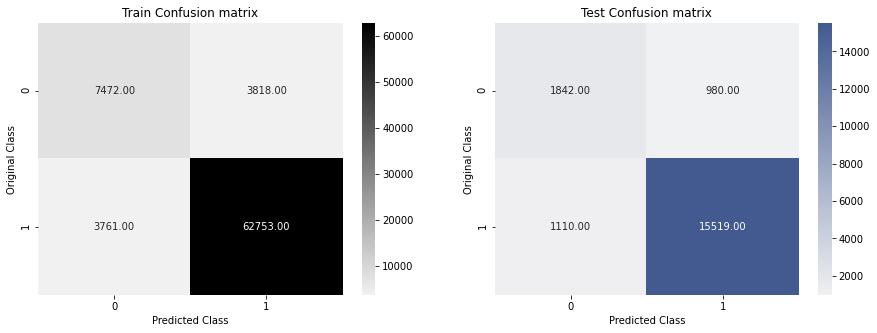

In [ ]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred,'bs_lr.png')

Observation(s):
* Total 13 numerical features and 4 categorical features are taken. 
* Logistic Regression Model is performing better than the other models.
* Logistic Regression Model is choosen as a baseline model(randomly).
* LR Model Scores: train f1-score = 0.8032754835521972 and test f1_score = 0.787471966907421
* From the both train amnd tesr confusion matrix ,we can observe that the False Psitive and False Negative values are still very large lets try to reduce these values by adding some features and through feacure selection methods.

#4.Feature Engineering

From the existing solution
1. **Sellers Count**: Total number of sellers per product (Numerical feat.).
2. **Products count**: Total number of products ordered per order (Numerical feat.).
3. **Estimated Delivery Time(in number of days)**: Estimated number of days tto deliver the producti.e (order_approval_date - order_estimated_delivery_date)(Numerical feat.).
4. **Actual Delivery Time**: Actual number of days taken to deliver the product(Numerical feat.).
5. **Difference in delivery days**:- Difference between the actual and estimated date(Numerical feat.).``` Negative : delivered early ,positive : delivered late.```

6. **Is Late**:- If delivered late then True else False (Binary).

7. **Average Product Value**:- Cheaper products might have lower quality, leaving customers unhappy (Numerical feat.).
8. **Total Order Value**:- If a customer expends more, he might expect a better order fulfilment(Numerical feat.).
9. **Order Freight Ratio**:- If a customer pays more for freight, he might expect a better service(Numerical feat.).
10. **Purchase Day of Week**:- Day of week on which purchase was made(Numerical feat.).
11. **is_reviewed**:- If the review comment is given or not.

other:

12. **Recency** : number of days since the last purchase(present date -last ordered date)(Numerical feat.).
13. **Frequency** : number of transactions made over the period(present date -last ordered date)(Numerical feat.).
14. **Monetary** : amount spent over a given period time (Numerical feat.)
15. **RFM Levels** :Behavioral segmentations using above three features (Categorical).
16. **words per review** : Total number of words per review (Numerical feat.).

In [ ]:
data_n = pd.read_pickle('/content/drive/MyDrive/final.pkl')
data_n.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3,voucher,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,2,voucher,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [ ]:
#sellers count for each product
fea_1= data_n.groupby('product_id').count()['seller_id']
fea_1_df = pd.DataFrame()
fea_1_df['product_id']= fea_1.index
fea_1_df['sellers_count']= fea_1.values
fea_1_df.head()

,product_id,sellers_count
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1


In [ ]:
#sellers count for each product
fea_2 = data_n.groupby('order_id').count()['product_id']
fea_2_df = pd.DataFrame()
fea_2_df['order_id']= fea_2.index
fea_2_df['products_count']= fea_2.values
fea_2_df.head()


,order_id,products_count
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [ ]:
# Adding the seller count and products count feature to the final data set
data_n = pd.merge(data_n,fea_1_df,on='product_id')
data_n = pd.merge(data_n,fea_2_df,on='order_id')


In [ ]:
#Extrcting Features (taken from existing soluting )

# https://www.kaggle.com/andresionek/predicting-customer-satisfaction

# calculating estimated delivery time
data_n['est_delivery_t'] = (data_n['order_estimated_delivery_date'] - data_n['order_approved_at']).dt.days

# calculating actual delivery time
data_n['act_delivery_t'] = (data_n['order_delivered_customer_date'] - data_n['order_approved_at']).dt.days

# calculating diff_in_delivery_time
data_n['diff_in_delivery_t'] = data_n['est_delivery_t'] - data_n['act_delivery_t']

# finding if delivery was lare
data_n['on_time_delivery'] = data_n['order_delivered_customer_date'] < data_n['order_estimated_delivery_date']
data_n['on_time_delivery'] = data_n['on_time_delivery'].astype('int')

# calculating mean product value
data_n['avg_prdt_value'] = data_n['price']/data_n['products_count']

# finding total order cost
data_n['total_order_cost'] = data_n['price'] + data_n['freight_value']

# calculating order freight ratio
data_n['order_freight_ratio'] = data_n['freight_value']/data_n['price']

# finding the day of week on which order was made
data_n['purchase_dayofweek'] = pd.to_datetime(data_n['order_purchase_timestamp']).dt.dayofweek

# adding is_reviewed where 1 is if review comment is given otherwise 0.
data_n['is_reviewed'] = (data_n['review_comment_message'] != 'no_review').astype('int')

In [ ]:
#list(data.groupby('customer_id')['order_purchase_dayofweek'].agg([('year_avg','mean')])['year_avg'])

In [ ]:
rfm = pd.read_pickle('/content/drive/MyDrive/rfm.pkl')
rfm.head()

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,RFM_Score,RFM_Score_s,RFM_Level
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,1,4,3,413,8,Champions
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,1,4,1,411,6,Potential
0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2,112,4,Needs Attention
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,1,2,1,211,4,Needs Attention
0004aac84e0df4da2b147fca70cf8255,292,1,196.89,1,2,3,213,6,Potential


In [ ]:
data_n = data_n.merge(rfm ,on ='customer_unique_id',how='left')

In [ ]:
data_n.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm    

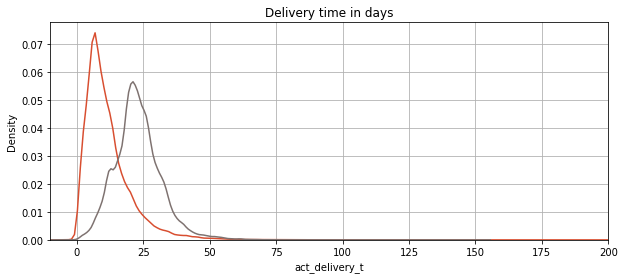

In [ ]:
# Delivery estimated time and actual delivery time
plt.figure(figsize=(10,4))
plt.title("Delivery time in days")
plt.xlim(-10, 200)
plt.grid()

ax1 = sns.kdeplot(data_n['act_delivery_t'], color="#D84E30", label='Delivery time')
ax2 = sns.kdeplot(data_n['est_delivery_t'], color="#7E7270", label='Estimated delivery time')
plt.savefig('pr_fig1.png', dpi=480, bbox_inches='tight')

In [ ]:

col= ['order_id',
 'customer_id',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
  'customer_unique_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'f_quartile',
 'r_quartile',
 'm_quartile',
 'RFM_Score','RFM_Score_s','product_category_name']


In [ ]:
data_n.drop(columns=col,axis=1,inplace=True)
data_n.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,...,on_time_delivery,avg_prdt_value,total_order_cost,order_freight_ratio,purchase_dayofweek,is_reviewed,recency,frequency,monetary,RFM_Level
0,delivered,1,credit_card,1,18.12,3149,sao paulo,SP,29.99,8.72,...,1,9.996667,38.71,0.290764,0,1,335,4,82.82,Promising
1,delivered,3,voucher,1,2.00,3149,sao paulo,SP,29.99,8.72,...,1,9.996667,38.71,0.290764,0,1,335,4,82.82,Promising
2,delivered,2,voucher,1,18.59,3149,sao paulo,SP,29.99,8.72,...,1,9.996667,38.71,0.290764,0,1,335,4,82.82,Promising
3,delivered,1,credit_card,3,37.77,3366,sao paulo,SP,29.99,7.78,...,1,29.990000,37.77,0.259420,1,1,383,1,37.77,Require Activation
4,delivered,1,credit_card,1,37.77,2290,sao paulo,SP,29.99,7.78,...,1,29.990000,37.77,0.259420,2,1,396,1,37.77,Require Activation


In [ ]:
#text preprocessing
processed_text = preprocess_text(data_n['review_comment_message'].values)

100%|██████████| 115609/115609 [00:22<00:00, 5176.95it/s]


In [ ]:
data_n['review_comment_message'] = processed_text
data_n['review_comment_message'].head(5)

0    neg test produt aind vei corret boa cond apen ...
1    neg test produt aind vei corret boa cond apen ...
2    neg test produt aind vei corret boa cond apen ...
3    dev embal melhor produt caix vei tod amass vou...
4                   ach pequen pra seil xíc bom produt
Name: review_comment_message, dtype: object

Spliting data in Train and Test.

In [ ]:
y = data_n['review_score'].values
X = data_n.drop(['review_score'], axis=1)
print("      X ","        y")
print(X.shape,y.shape)
print('\n')
X.head(1)   

      X          y
(115609, 34) (115609,)




,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,...,on_time_delivery,avg_prdt_value,total_order_cost,order_freight_ratio,purchase_dayofweek,is_reviewed,recency,frequency,monetary,RFM_Level
0,delivered,1,credit_card,1,18.12,3149,sao paulo,SP,29.99,8.72,...,1,9.996667,38.71,0.290764,0,1,335,4,82.82,Promising


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=25)


print(" X_train","   y_train")
print(X_train.shape,y_train.shape)
print('-'*15)
print("X_test","    y_test")
print(X_test.shape,y_test.shape)

 X_train    y_train
(92487, 34) (92487,)
---------------
X_test     y_test
(23122, 34) (23122,)


In [ ]:
pickle.dump(X_train,open('X_train.pkl','wb'))
pickle.dump(X_test,open('X_test.pkl','wb'))
pickle.dump(y_train,open('y_train.pkl','wb'))
pickle.dump(y_test,open('y_test.pkl','wb'))

In [ ]:
X_train = pickle.load(open('X_train.pkl', 'rb'))
X_test = pickle.load(open('X_test.pkl', 'rb'))
y_train = pickle.load(open('y_train.pkl','rb'))
y_test = pickle.load(open('y_test.pkl','rb'))

#4.1 Featurization

### Featurization of text data

In [ ]:
tfidf_w2v_vectors_train.shape,tfidf_w2v_vectors_test.shape

((92487, 300), (23122, 300))

In [ ]:
pickle.dump(tfidf_w2v_vectors_train,open('tfidf_w2v_vectors_train.pkl','wb'))
pickle.dump(tfidf_w2v_vectors_test,open('tfidf_w2v_vectors_test.pkl','wb'))

## Encoding Categorical Features

### Encoding Categorical Features: order_status

In [ ]:

vectorizer = CountVectorizer(binary= True)
vectorizer.fit(X_train['order_status'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
order_st_tr = vectorizer.transform(X_train['order_status'].values)

order_st_te = vectorizer.transform(X_test['order_status'].values)

print("After vectorizations")
print(order_st_tr.shape, y_train.shape)
print(order_st_tr.shape, y_test.shape)


After vectorizations
(92487, 7) (92487,)
(92487, 7) (23122,)


### Encoding Categorical Features:payment_type

In [ ]:
vectorizer = CountVectorizer(binary= True)
vectorizer.fit(X_train['payment_type'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
pay_typ_tr = vectorizer.transform(X_train['payment_type'].values)

pay_typ_te = vectorizer.transform(X_test['payment_type'].values)

print("After vectorizations")
print(pay_typ_tr.shape, y_train.shape)
print(pay_typ_tr.shape, y_test.shape)


After vectorizations
(92487, 4) (92487,)
(92487, 4) (23122,)


### Encoding Categorical Features:product_category_name_english

In [ ]:
vectorizer = CountVectorizer(binary= True)
vectorizer.fit(X_train['product_category_name_english'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
prod_cat_tr = vectorizer.transform(X_train['product_category_name_english'].values)

prod_cat_te = vectorizer.transform(X_test['product_category_name_english'].values)

print("After vectorizations")
print(prod_cat_tr.shape, y_train.shape)
print(prod_cat_tr.shape, y_test.shape)


After vectorizations
(92487, 71) (92487,)
(92487, 71) (23122,)


### Encoding Categorical Features: customer_state

In [ ]:
vectorizer = CountVectorizer(binary= True)
vectorizer.fit(X_train['customer_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
state_tr = vectorizer.transform(X_train['customer_state'].values)

state_te = vectorizer.transform(X_test['customer_state'].values)

print("After vectorizations")
print(state_tr.shape, y_train.shape)
print(state_tr.shape, y_test.shape)


After vectorizations
(92487, 27) (92487,)
(92487, 27) (23122,)


### Encoding Categorical Features: RFM_Level

In [ ]:
vectorizer = CountVectorizer(binary= True)
vectorizer.fit(X_train['RFM_Level'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
rfm_tr = vectorizer.transform(X_train['RFM_Level'].values)

rfm_te = vectorizer.transform(X_test['RFM_Level'].values)

print("After vectorizations")
print(rfm_tr.shape, y_train.shape)
print(rfm_tr.shape, y_test.shape)


After vectorizations
(92487, 11) (92487,)
(92487, 11) (23122,)


## Numerical features

In [ ]:
# numerical features
num=['payment_sequential',
 'payment_installments',
 'payment_value',
 'customer_zip_code_prefix',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'recency',
 'frequency',
 'monetary',
 'sellers_count',
 'products_count',
 'est_delivery_t',
 'act_delivery_t',
 'diff_in_delivery_t',
 'on_time_delivery',
 'avg_prdt_value',
 'total_order_cost',
 'order_freight_ratio',
 'purchase_dayofweek',
 'is_reviewed']

In [ ]:
tr=[]
te=[]
for i in num:
  a,b = normalizer(i)
  tr.append(a)
  te.append(b)



In [ ]:
from scipy.sparse import hstack,csr_matrix
import numpy as np

X_tr_num = np.hstack((tr))
X_te_num = np.hstack((te))


print("Final Data matrix")
print(X_tr_num.shape, y_train.shape)
print(X_te_num.shape, y_test.shape)

Final Data matrix
(92487, 27) (92487,)
(23122, 27) (23122,)


In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((tfidf_w2v_vectors_train,order_st_tr,pay_typ_tr,prod_cat_tr,state_tr,rfm_tr,X_tr_num)).tocsr()
X_te = hstack((tfidf_w2v_vectors_test,order_st_te,pay_typ_te,prod_cat_te,state_te,rfm_te,X_te_num)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)

print(X_te.shape, y_test.shape)
print("="*100)
print('')

Final Data matrix
(92487, 447) (92487,)
(23122, 447) (23122,)



In [ ]:
pickle.dump(X_tr,open('X_tr.pkl','wb'))
pickle.dump(X_te,open('X_te.pkl','wb'))


In [ ]:
X_tr = pickle.load(open('X_tr.pkl', 'rb'))
X_te = pickle.load(open('X_te.pkl', 'rb'))


#4.2 Baseline Model:(Logistic Regression Model)

Alpha =  1e-05 Train Score 0.7962455210251356 test Score 0.7982589031339031
Alpha =  0.0001 Train Score 0.7803876142408842 test Score 0.7827799756288915
Alpha =  0.001 Train Score 0.713537365426639 test Score 0.7196937578374314
Alpha =  0.01 Train Score 0.6628598690593523 test Score 0.6647666541259591
Alpha =  0.1 Train Score 0.45634577741725 test Score 0.45634948625708305
Alpha =  1 Train Score 0.45634577741725 test Score 0.45634948625708305
Alpha =  10 Train Score 0.45634577741725 test Score 0.45634948625708305
Alpha =  100 Train Score 0.45634577741725 test Score 0.45634948625708305
Alpha =  1000 Train Score 0.45634577741725 test Score 0.45634948625708305


Text(0.5, 1.0, 'Alpha vs Score')

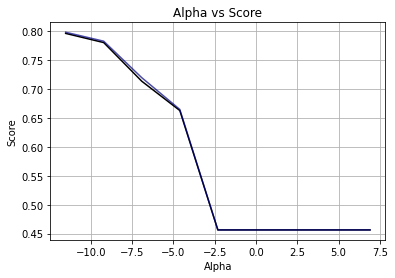

In [ ]:
# Training Logistic regression model and chekcing f1 score metric
alpha = [10 ** x for x in range(-5, 4)]
train_scores = [] # store train scores
test_scores = [] # store test scores

for i in alpha:
    lr = SGDClassifier(loss='log', penalty='l2', alpha=i, n_jobs=-1, random_state=25)
    lr.fit(X_tr,y_train)
    train_sc = f1_score(y_train,lr.predict(X_tr),average='macro')
    test_sc = f1_score(y_test,lr.predict(X_te),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Alpha = ',i,'Train Score',train_sc,'test Score',test_sc)
    
# plotting the scores vs parameters
plt.plot(np.log(alpha),train_scores,label='Train Score',color='black')
plt.plot(np.log(alpha),test_scores,label='Test Score',color='#000080',alpha=0.7)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid()
plt.title('Alpha vs Score')

In [ ]:
# Parameter tuning of Logistic regression using RandomisedSearch CV technique
sgd = SGDClassifier(loss='log', n_jobs=-1, random_state=25)
 
prams={ 'alpha': [10 ** x for x in range(-5, 4)] }

random_cfl1 = RandomizedSearchCV(sgd,param_distributions=prams,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,
                               return_train_score=True)
random_cfl1.fit(X_tr,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
mean test scores [0.80352594 0.75580968 0.68079953 0.66279404 0.45655571 0.45634578
 0.45634578 0.45634578 0.45634578]
mean train scores [0.80713412 0.75823059 0.68224009 0.66282692 0.45658985 0.45634578
 0.45634578 0.45634578 0.45634578]


In [ ]:
# printing best parameters and score
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters:  {'alpha': 1e-05}
Best Score:  0.803525940534614


In [ ]:
# Fitting LogisticRegression mpdel on best parameters
sgd = SGDClassifier(loss='log', alpha=1e-05, n_jobs=-1, random_state=25)
sgd.fit(X_tr,y_train)


y_train_pred = sgd.predict(X_tr)
y_test_pred = sgd.predict(X_te)

# printing train and test scores 
print('Train f1 score: ',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score: ',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score:  0.7962455210251356
Test f1 score:  0.7982589031339031


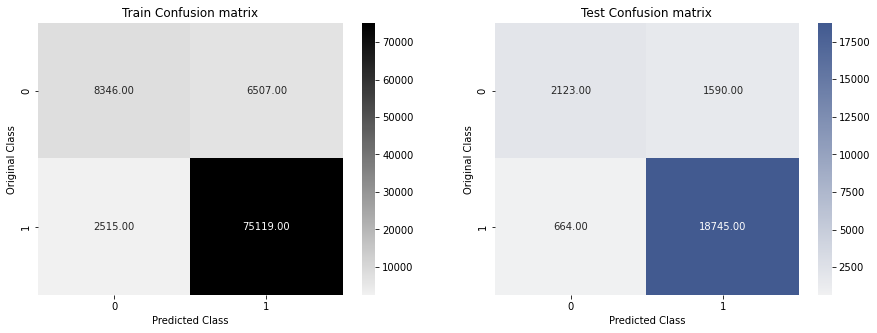

In [ ]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred,'feat_md_lr.png')

Observation(s):

* After adding new features ,we have total 29 numerical features and 5 categorical features and text data(300 dim).

* Train f1 score:  0.74714702593478647,Test f1 score:  0.7328464710133609
* From the both train and test confusion matrix , we can observe that the false positive values are increased.we will try to reduce it by selection important features.


#5.Feature Extraction/Selection using AutoEncoders

In [ ]:

#Importing the Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model



In [ ]:

# AutoEncoder Model Preparation
n_inputs = X_tr.shape[1]
# define encoder
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(round(float(n_inputs) / 2.0))(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(round(float(n_inputs) / 3.0))(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck (half of Input)
n_bottleneck = round(float(n_inputs) / 4.0)
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(round(float(n_inputs) / 3.0))(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(round(float(n_inputs) / 2.0))(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [ ]:
# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')



In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 447)]             0         
                                                                 
 dense (Dense)               (None, 224)               100352    
                                                                 
 batch_normalization (BatchN  (None, 224)              896       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 224)               0         
                                                                 
 dense_1 (Dense)             (None, 149)               33525     
                                                                 
 batch_normalization_1 (Batc  (None, 149)              596       
 hNormalization)                                             

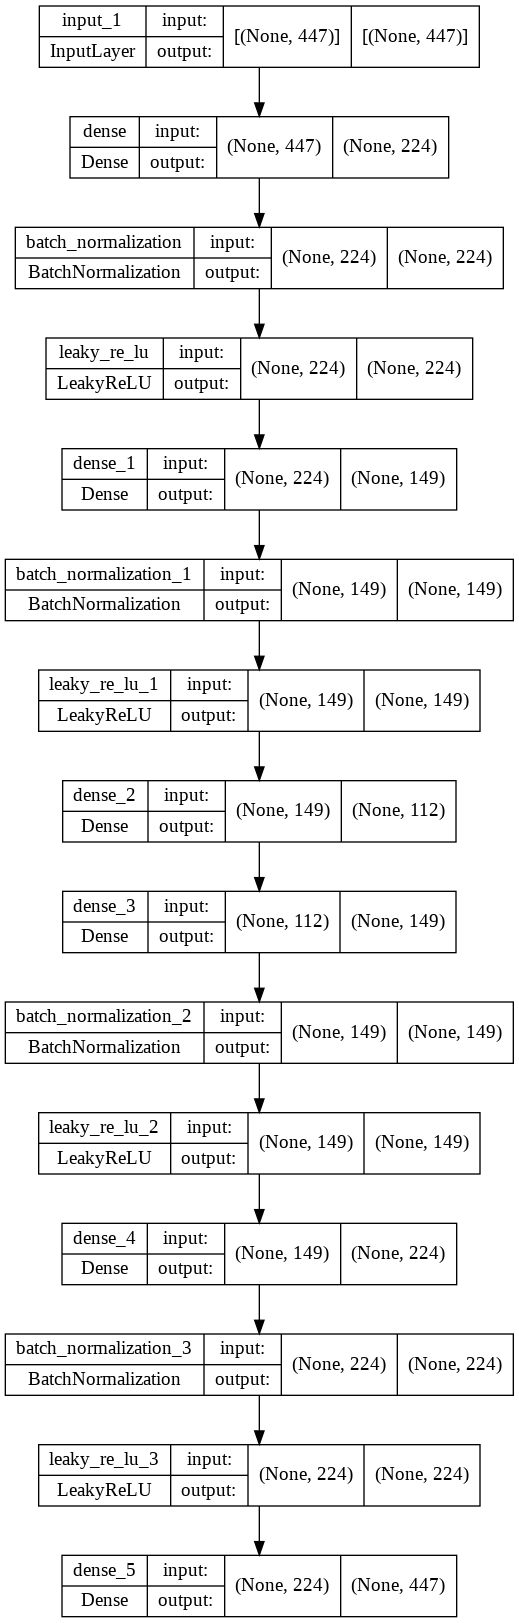

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='encode.png', show_shapes=True, show_layer_names=True)

In [ ]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_tr, y_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_te,y_test))

Epoch 1/50
5781/5781 - 44s - loss: 0.0948 - val_loss: 0.0887 - 44s/epoch - 8ms/step
Epoch 2/50
5781/5781 - 38s - loss: 0.0820 - val_loss: 0.0723 - 38s/epoch - 7ms/step
Epoch 3/50
5781/5781 - 38s - loss: 0.0782 - val_loss: 0.0718 - 38s/epoch - 7ms/step
Epoch 4/50
5781/5781 - 39s - loss: 0.0756 - val_loss: 0.0754 - 39s/epoch - 7ms/step
Epoch 5/50
5781/5781 - 39s - loss: 0.0744 - val_loss: 0.0748 - 39s/epoch - 7ms/step
Epoch 6/50
5781/5781 - 38s - loss: 0.0732 - val_loss: 0.0722 - 38s/epoch - 7ms/step
Epoch 7/50
5781/5781 - 39s - loss: 0.0725 - val_loss: 0.0686 - 39s/epoch - 7ms/step
Epoch 8/50
5781/5781 - 38s - loss: 0.0719 - val_loss: 0.0699 - 38s/epoch - 7ms/step
Epoch 9/50
5781/5781 - 39s - loss: 0.0712 - val_loss: 0.0674 - 39s/epoch - 7ms/step
Epoch 10/50
5781/5781 - 39s - loss: 0.0709 - val_loss: 0.0678 - 39s/epoch - 7ms/step
Epoch 11/50
5781/5781 - 38s - loss: 0.0700 - val_loss: 0.0671 - 38s/epoch - 7ms/step
Epoch 12/50
5781/5781 - 39s - loss: 0.0696 - val_loss: 0.0707 - 39s/epoch 

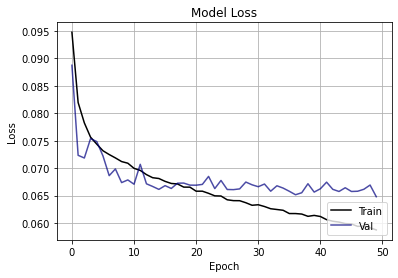

In [ ]:

plt.plot(history.history['loss'],color='black')
plt.plot(history.history['val_loss'],color='#000080',alpha=0.7)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.grid()
plt.savefig('enc_loss.png', dpi=480, bbox_inches='tight')
plt.show()

In [ ]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')



In [ ]:
# load the model from file
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(X_tr)
print('X_train_encode',X_train_encode.shape)
# encode the test data
X_test_encode = encoder.predict(X_te)
print('X_test_encode',X_test_encode.shape)

X_train_encode (92487, 112)
X_test_encode (23122, 112)


Alpha =  1e-05 Train Score 0.8287967070845299 test Score 0.8108359928197262
Alpha =  0.0001 Train Score 0.7912250004418275 test Score 0.7743864312310977
Alpha =  0.001 Train Score 0.8529854910132961 test Score 0.8254430860131959
Alpha =  0.01 Train Score 0.8320238048849724 test Score 0.8059670045581453
Alpha =  0.1 Train Score 0.8517767309758097 test Score 0.8215044748367213
Alpha =  1 Train Score 0.8598254047613039 test Score 0.8280678805618026
Alpha =  10 Train Score 0.8552352553822216 test Score 0.8262940030560773
Alpha =  100 Train Score 0.838193057454892 test Score 0.8090139512462686
Alpha =  1000 Train Score 0.5712396009983755 test Score 0.5608577497782238


Text(0.5, 1.0, 'Alpha vs Score')

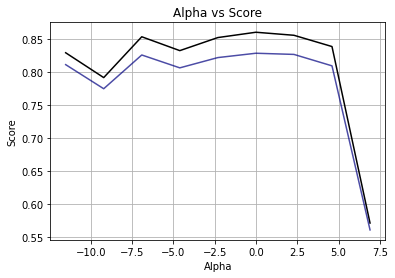

In [ ]:
# Training Logistic regression model and chekcing f1 score metric
alpha = [10 ** x for x in range(-5, 4)]
train_scores = [] # store train scores
test_scores = [] # store test scores

for i in alpha:
    lr = SGDClassifier(loss='log', penalty='l2', alpha=i, n_jobs=-1, random_state=25)
    lr.fit(X_train_encode,y_train)
    train_sc = f1_score(y_train,lr.predict(X_train_encode),average='macro')
    test_sc = f1_score(y_test,lr.predict(X_test_encode),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Alpha = ',i,'Train Score',train_sc,'test Score',test_sc)
    
# plotting the scores vs parameters
plt.plot(np.log(alpha),train_scores,label='Train Score',color='black')
plt.plot(np.log(alpha),test_scores,label='Test Score',color='#000080',alpha=0.7)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid()
plt.title('Alpha vs Score')

In [ ]:
# Parameter tuning of Logistic regression using RandomisedSearch CV technique
sgd = SGDClassifier(loss='log', n_jobs=-1, random_state=25)
 
prams={ 'alpha': [10 ** x for x in range(-5, 4)] }

random_cfl1 = RandomizedSearchCV(sgd,param_distributions=prams,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,
                               return_train_score=True)
random_cfl1.fit(X_train_encode,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
mean test scores [0.77935618 0.81951624 0.82475275 0.8574577  0.85730213 0.86072504
 0.85558924 0.8384062  0.57145035]
mean train scores [0.78094178 0.81905584 0.82579737 0.85726746 0.85712637 0.86025866
 0.85562093 0.83855619 0.57167152]


In [ ]:
# printing best parameters and score
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters:  {'alpha': 1}
Best Score:  0.8607250406470653


In [ ]:
# Fitting LogisticRegression mpdel on best parameters
sgd = SGDClassifier(loss='log', alpha=0.1, n_jobs=-1, random_state=25)
sgd.fit(X_train_encode,y_train)

y_train_pred = sgd.predict(X_train_encode)
y_test_pred = sgd.predict(X_test_encode)

# printing train and test scores 
print('Train f1 score: ',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score: ',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score:  0.8517767309758097
Test f1 score:  0.8215044748367213


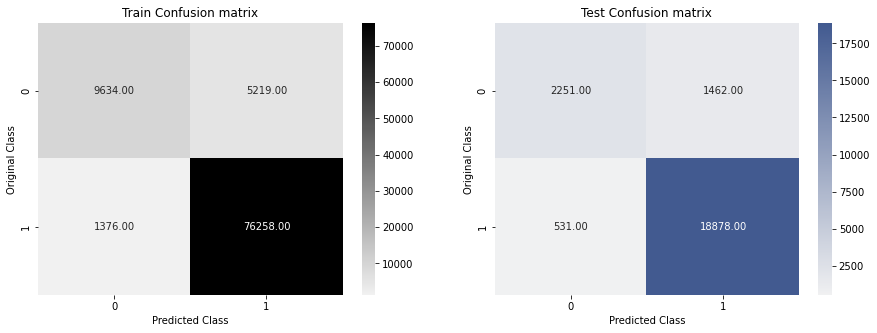

In [ ]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred,'encoder.png')

Observation(s):

* After extracting important featres using auto_encoder ,we have 112 features.
* The train f1_score is increased to 0.8561932056894956 and and test f1-score to 0.8026991971236722.

* lets try other machine learning models to improve the score

Depth =  3 Train Score 0.8620132220424727 test Score 0.829856441571301
Depth =  10 Train Score 0.8916094335757421 test Score 0.8287414809244926
Depth =  50 Train Score 0.9920572593011814 test Score 0.786222503550379
Depth =  100 Train Score 1.0 test Score 0.7788800682153525
Depth =  250 Train Score 1.0 test Score 0.7788800682153525
Depth =  500 Train Score 1.0 test Score 0.7788800682153525


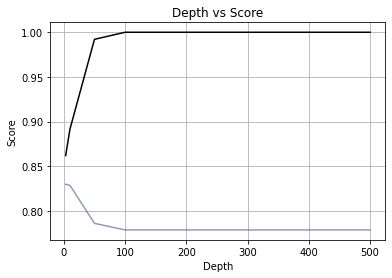

In [ ]:
# Checking the variation of score with depth parameters of Decision Tree
depth = [3,10,50,100,250,500]
train_scores = []
test_scores = []
for i in depth:
    clf = DecisionTreeClassifier(max_depth=i,random_state=25)
    clf.fit(X_train_encode,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train_encode),average='macro')
    test_sc = f1_score(y_test,clf.predict(X_test_encode),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Depth = ',i,'Train Score',train_sc,'test Score',test_sc)

# plotting the score vs depth
plt.plot(depth,train_scores,label='Train Score',color='black')
plt.plot(depth,test_scores,label='Test Score',color='#425a90',alpha=0.6)
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs Score')
plt.grid()
plt.show()

In [ ]:
# Parameter tuning of DecisionTreeClassifier using RandomisedSearch CV technique

dt = DecisionTreeClassifier(random_state=25)

params = { "max_depth": sp_randint(3,500), "min_samples_split": sp_randint(50,200), "min_samples_leaf": sp_randint(2,50)}

random_cfl1 = RandomizedSearchCV(dt, param_distributions=params,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,
                               return_train_score=True)
random_cfl1.fit(X_train_encode,y_train)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
mean test scores [0.86592093 0.86559388 0.86004222 0.86647698 0.8599296  0.85914654
 0.85119657 0.86472546 0.86466146 0.86420445]
mean train scores [0.87597114 0.87643896 0.88353408 0.87654491 0.88459087 0.88494589
 0.89687376 0.87942446 0.8783833  0.87841845]


In [ ]:
# printing best parameters and scores
print("Best Parameters: ",random_cfl1.best_params_)
print("Best Score: ",random_cfl1.best_score_)

Best Parameters:  {'max_depth': 256, 'min_samples_leaf': 33, 'min_samples_split': 179}
Best Score:  0.8664769796044803


In [ ]:
# Fitting the model on best parameters
dt = DecisionTreeClassifier(max_depth = 135, min_samples_leaf = 28, min_samples_split = 193,random_state=25)
dt.fit(X_train_encode,y_train)

y_train_pred = dt.predict(X_train_encode)
y_test_pred = dt.predict(X_test_encode)

# printing train test score
print('Train f1 score',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score 0.876993567201608
Test f1 score 0.8284902136079639


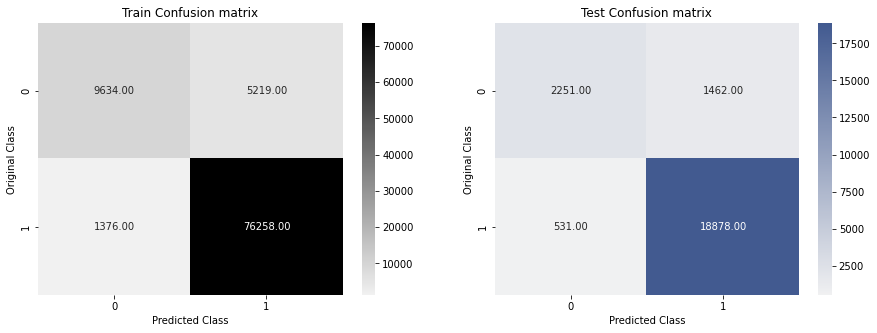

In [ ]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred,'dt.png')

Estimators =  5 Train Score 0.865430034472356 test Score 0.8305088182363036
Estimators =  10 Train Score 0.8666596878189086 test Score 0.8320816758778288
Estimators =  50 Train Score 0.8676786320414797 test Score 0.8323628846677086
Estimators =  100 Train Score 0.8676463025412762 test Score 0.8327980581853178
Estimators =  250 Train Score 0.8672305924517802 test Score 0.8327224426037871
Estimators =  500 Train Score 0.8670334362774175 test Score 0.8331412592484913


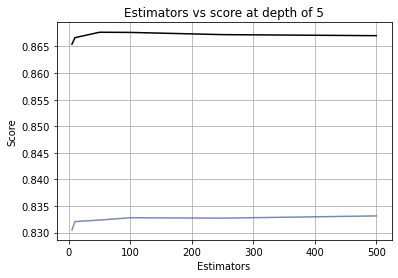

In [ ]:
#Random forest
estimators = [5,10,50,100,250,500]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train_encode,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train_encode),average='macro')
    test_sc = f1_score(y_test,clf.predict(X_test_encode),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score',color='black')
plt.plot(estimators,test_scores,label='Test Score',color='#425a90',alpha=0.7)
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')
plt.grid()

In [ ]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train_encode,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train_encode),average='macro')
    test_sc = f1_score(y_test,clf.predict(X_test_encode),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score',color='black')
plt.plot(depths,test_scores,label='Test Score',color='#425a90',alpha=0.6)
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score')
plt.grid()
plt.show()

depth =  3 Train Score 0.8560652339026922 test Score 0.8248270290764603
depth =  9 Train Score 0.8753442743109014 test Score 0.834241075837538
depth =  11 Train Score 0.8764962370403686 test Score 0.8339140400701643
depth =  15 Train Score 0.8772161379480221 test Score 0.8335371952928904
depth =  20 Train Score 0.8773245944433938 test Score 0.8339488443361502
depth =  35 Train Score 0.8772453918144039 test Score 0.8340405642832551
depth =  50 Train Score 0.8772123954998107 test Score 0.8341472677217096


In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1_macro',random_state=25,return_train_score=True )

rf_random.fit(X_train_encode,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

In [ ]:
# printing best parameters and score
print("Best Parameters: ",rf_random.best_params_)
print("Best Score: ",rf_random.best_score_)

In [ ]:

# Fitting the model on best parameters
rf_classifier = RandomForestClassifier(max_depth = 13, min_samples_leaf = 49, min_samples_split = 165, n_estimators = 108,random_state=25,
                           n_jobs=-1)
rf_classifier.fit(X_train_encode,y_train)

y_train_pred = rf_classifier.predict(X_train_encode)
y_test_pred = rf_classifier.predict(X_test_encode)

# printing train and test scores
print('Train f1 score',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score',f1_score(y_test,y_test_pred,average='macro'))

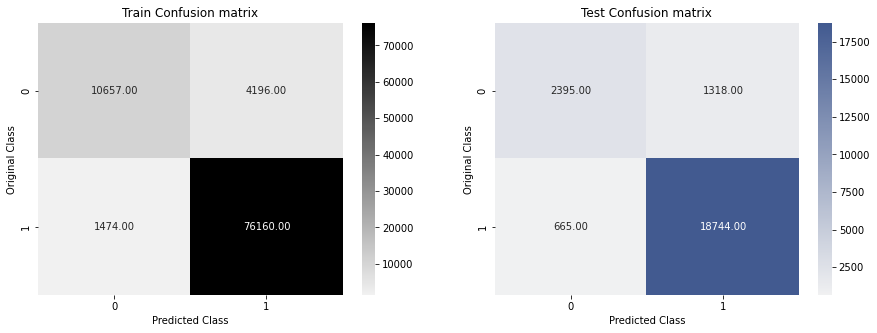

In [ ]:
confusion_matrices_plot(y_train,y_train_pred,y_test,y_test_pred,'rf.png')

In [ ]:
from sklearn.svm import SVC as svc 

train_scores = []
test_scores = []
for i in depth:
    clf = svc(max_depth=i,random_state=25)
    clf.fit(X_train_encode,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train_encode),average='macro')
    test_sc = f1_score(y_test,clf.predict(X_test_encode),average='macro')
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Depth = ',i,'Train Score',train_sc,'test Score',test_sc)

# plotting the score vs depth
plt.plot(depth,train_scores,label='Train Score',color='black')
plt.plot(depth,test_scores,label='Test Score',color='#425a90',alpha=0.6)
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs Score')
plt.grid()
plt.show()

In [ ]:
from scipy import stats
mdl = svc(probability = True, random_state = 1)

rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(x, y) 
rand_search.cv_results_




print('mean test scores',rand_search.cv_results_['mean_test_score'])
print('mean train scores',rand_search.cv_results_['mean_train_score'])